# Plotting MERRA2 for RF05

In [2]:
import xarray as xr
import numpy as np
import glob
from datetime import datetime
from datetime import timedelta
from os.path import exists

# trick to read function in a separate file
import sys
sys.path.append('/glade/u/home/rberrios/python/PRECIP/')
from defineColormaps import *

import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
pth='/glade/derecho/scratch/rberrios/projects/ongoing/cpex-cv/dataMERRA-2/'
fname = f'{pth}MERRA2_400.inst6_3d_ana_Np.20220913-14.nc4'

minLat = -0.0
maxLat = 20.0
minLon = -30.0
maxLon = 0.0
centerLon = 0.0
lat_interval = 5.0
lon_interval = 5.0

ds = xr.open_dataset(fname).sel(time=slice('2022-09-13 12:00:00','2022-09-15 00:00:00'),lat=slice(minLat,maxLat),lon=slice(minLon,maxLon))
formatted_time_strings = ds.time.dt.strftime('%Y-%m-%d %H:%M')
ds

<xarray.Dataset> Size: 12MB
Dimensions:  (time: 6, lon: 49, lat: 41, lev: 42)
Coordinates:
  * time     (time) datetime64[ns] 48B 2022-09-13T12:00:00 ... 2022-09-14T18:...
  * lon      (lon) float64 392B -30.0 -29.38 -28.75 -28.12 ... -1.25 -0.625 0.0
  * lat      (lat) float64 328B 0.0 0.5 1.0 1.5 2.0 ... 18.0 18.5 19.0 19.5 20.0
  * lev      (lev) float64 336B 1e+03 975.0 950.0 925.0 ... 0.5 0.4 0.3 0.1
Data variables:
    SLP      (time, lat, lon) float32 48kB ...
    PS       (time, lat, lon) float32 48kB ...
    H        (time, lev, lat, lon) float32 2MB ...
    T        (time, lev, lat, lon) float32 2MB ...
    U        (time, lev, lat, lon) float32 2MB ...
    V        (time, lev, lat, lon) float32 2MB ...
    QV       (time, lev, lat, lon) float32 2MB ...
    O3       (time, lev, lat, lon) float32 2MB ...
Attributes: (12/33)
    CDI:                               Climate Data Interface version 2.4.4 (...
    Conventions:                       CF-1
    History:                           Original file generated: Fri Sep 23 22...
    Comment:                           GMAO filename: d5124_m2_jan10.inst6_3d...
    Filename:                          MERRA2_400.inst6_3d_ana_Np.20220913.nc4
    Institution:                       NASA Global Modeling and Assimilation ...
    ...                                ...
    RangeBeginningDate:                2022-09-13
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2022-09-13
    RangeEndingTime:                   18:00:00.000000
    history:                           Tue Jul 01 16:54:05 2025: cdo cat MERR...
    CDO:                               Climate Data Operators version 2.4.4 (...

Calculate PW

In [4]:
# calculate dry air density
Rd = 287.15
G = 9.81
rhod = ds.lev*100.0/(Rd*ds.T)

# vertical integral
QV = ds.QV
# Replace NaNs with 0.0 using fillna()
QV = QV.fillna(0.0)
rhod = rhod.fillna(0.0)
PW = -np.trapz(QV*rhod,ds.lev*100.0,axis=1)/G
PW = xr.DataArray(PW,coords=[ds.time,ds.lat,ds.lon],dims=('time','lat','lon'))
PW

<xarray.DataArray (time: 6, lat: 41, lon: 49)> Size: 96kB
array([[[38.76827722, 38.52714398, 37.17011412, ..., 37.38800574,
         37.47526238, 38.53097226],
        [40.79314508, 40.71428727, 39.33557384, ..., 37.28778813,
         37.56396228, 38.46330117],
        [42.32928327, 42.70320698, 41.72439215, ..., 37.05313002,
         37.44016872, 38.34241404],
        ...,
        [31.30463282, 30.71037623, 30.93635131, ..., 27.77099118,
         28.65113838, 27.11439705],
        [30.56025812, 30.20141597, 30.35472405, ..., 25.56118534,
         26.21856734, 26.46218871],
        [28.99207867, 29.62230135, 30.00406547, ..., 24.07580304,
         24.19484189, 24.93839332]],

       [[33.19305252, 31.90879815, 33.12238718, ..., 36.90739287,
         37.94800069, 39.18605212],
        [35.67215363, 33.93434391, 35.10397652, ..., 37.11216309,
         37.87979671, 39.097135  ],
        [38.81296386, 36.06062134, 36.22247221, ..., 37.63998905,
         38.07639122, 39.11267576],
...
        [49.83063592, 51.52527627, 53.54042853, ..., 32.99866478,
         33.09411079, 31.68938389],
        [48.68248142, 49.81290026, 50.76522265, ..., 32.09201337,
         33.12359586, 31.68887967],
        [47.20613519, 48.38818698, 48.66994828, ..., 30.2284233 ,
         32.44078724, 31.46658434]],

       [[31.0227306 , 31.71758909, 31.16527981, ..., 38.62203124,
         38.87760738, 39.85527826],
        [30.6662367 , 31.05848079, 30.95344448, ..., 39.42727919,
         39.90085844, 40.90447083],
        [31.39888467, 30.79936331, 30.72863437, ..., 40.40184615,
         41.20907928, 41.96774452],
        ...,
        [52.93935378, 52.65079542, 51.76525236, ..., 33.45760861,
         33.32353489, 33.04818046],
        [51.51109946, 51.33155737, 50.75365309, ..., 33.00730868,
         34.75701552, 34.23669765],
        [49.97237705, 49.80166761, 49.62833457, ..., 30.46126652,
         34.7771386 , 34.10920455]]])
Coordinates:
  * time     (time) datetime64[ns] 48B 2022-09-13T12:00:00 ... 2022-09-14T18:...
  * lat      (lat) float64 328B 0.0 0.5 1.0 1.5 2.0 ... 18.0 18.5 19.0 19.5 20.0
  * lon      (lon) float64 392B -30.0 -29.38 -28.75 -28.12 ... -1.25 -0.625 0.0

### Two panel plot: 925 hPa winds + ? and 650 hPa winds + PW?


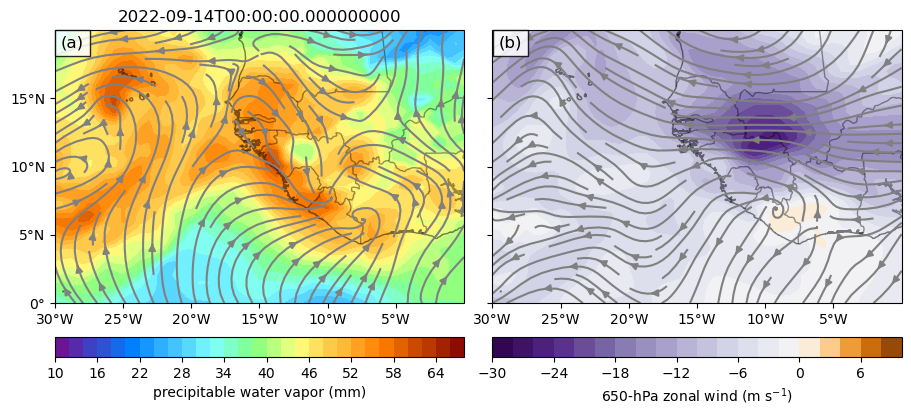

In [5]:
import matplotlib.colors as colors

# Create a TwoSlopeNorm instance
norm = colors.TwoSlopeNorm(vmin=-30, vcenter=0.0, vmax=10.0)

for i in [2]:
    # open figure and maps
    projection = ccrs.PlateCarree(central_longitude=centerLon)
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(9,9),constrained_layout=True,
                           subplot_kw={'projection': projection})
    
    for j, axis in enumerate(ax.flat):
        # ---- first map
        axis.set_extent([minLon, maxLon, minLat, maxLat], crs=projection)
        # Add Latitudes
        axis.set_yticks(np.arange(minLat, maxLat, lat_interval), crs=projection)
        if (j == 0):
            lat_formatter = LatitudeFormatter()
            axis.yaxis.set_major_formatter(lat_formatter)
        else:
            labels = [item.get_text() for item in axis.get_yticklabels()]
            empty_string_labels = ['']*len(labels)
            axis.set_yticklabels(empty_string_labels)  
        
        # Add Longitudes
        axis.set_xticks(np.arange(minLon, maxLon, lon_interval), crs=projection)
        lon_formatter = LongitudeFormatter(zero_direction_label=True)
        axis.xaxis.set_major_formatter(lon_formatter)
        
        
        #add land boundaries
        landColor='k'
        axis.add_feature(cfeature.COASTLINE.with_scale('10m'),alpha=0.5,edgecolor=landColor)
        axis.add_feature(cfeature.BORDERS, alpha=0.4,edgecolor=landColor)
        axis.add_feature(cfeature.LAKES, alpha=0.4,edgecolor=landColor,facecolor='none')
    
        # add panel labels
        label = f"({chr(j+97)})"
        axis.text(0.015, 0.98, label,
            horizontalalignment='left',
            verticalalignment='top',
            transform=axis.transAxes,
            fontsize='12', bbox=dict(facecolor='white', alpha=0.85))
            
            
    # Plot Data
    [X, Y] = np.meshgrid(PW.lon, PW.lat)
    im0 = ax[0].contourf(X, Y, PW.isel(time=i), cmap=defineColormap('precipw'), levels=np.arange(10,70,2))
    cb0 = plt.colorbar(im0, ax=ax[0], orientation='horizontal', pad=0.01)
    cb0.set_label('precipitable water vapor (mm)')
    # add wind streamlines
    [X, Y] = np.meshgrid(ds.lon, ds.lat)
    ax[0].streamplot(X,Y,ds.U.isel(time=i).sel(lev=925.0),ds.V.isel(time=i).sel(lev=925.0),color='gray')
    im1 = ax[1].contourf(X, Y, ds.U.isel(time=i).sel(lev=650.0),cmap='PuOr_r',levels=np.arange(-30,12,2), norm=norm)
    cb1 = plt.colorbar(im1, ax=ax[1], orientation='horizontal', pad=0.01)
    # add wind streamlines
    ax[1].streamplot(X,Y,ds.U.isel(time=i).sel(lev=650.0),ds.V.isel(time=i).sel(lev=650.0),color='gray')
    cb1.set_label('650-hPa zonal wind (m s$^{-1}$)')
    ax[0].set_title(ds.time.isel(time=i).values)
    plt.show()
    # plt.savefig('./Figures/merra-2_pw+wam+aej_tavg_14Sept22.jpeg', bbox_inches='tight', dpi=300)
    break

Multiple panels in a single plot.

<xarray.DataArray ()> Size: 4B
array(21.943594, dtype=float32)
Coordinates:
    time     datetime64[ns] 8B 2022-09-13T12:00:00
    lon      float64 8B -10.0
    lat      float64 8B 12.0
<xarray.DataArray ()> Size: 4B
array(28.608942, dtype=float32)
Coordinates:
    time     datetime64[ns] 8B 2022-09-14
    lon      float64 8B -10.0
    lat      float64 8B 12.0
<xarray.DataArray ()> Size: 4B
array(18.648134, dtype=float32)
Coordinates:
    time     datetime64[ns] 8B 2022-09-14T12:00:00
    lon      float64 8B -10.0
    lat      float64 8B 12.0


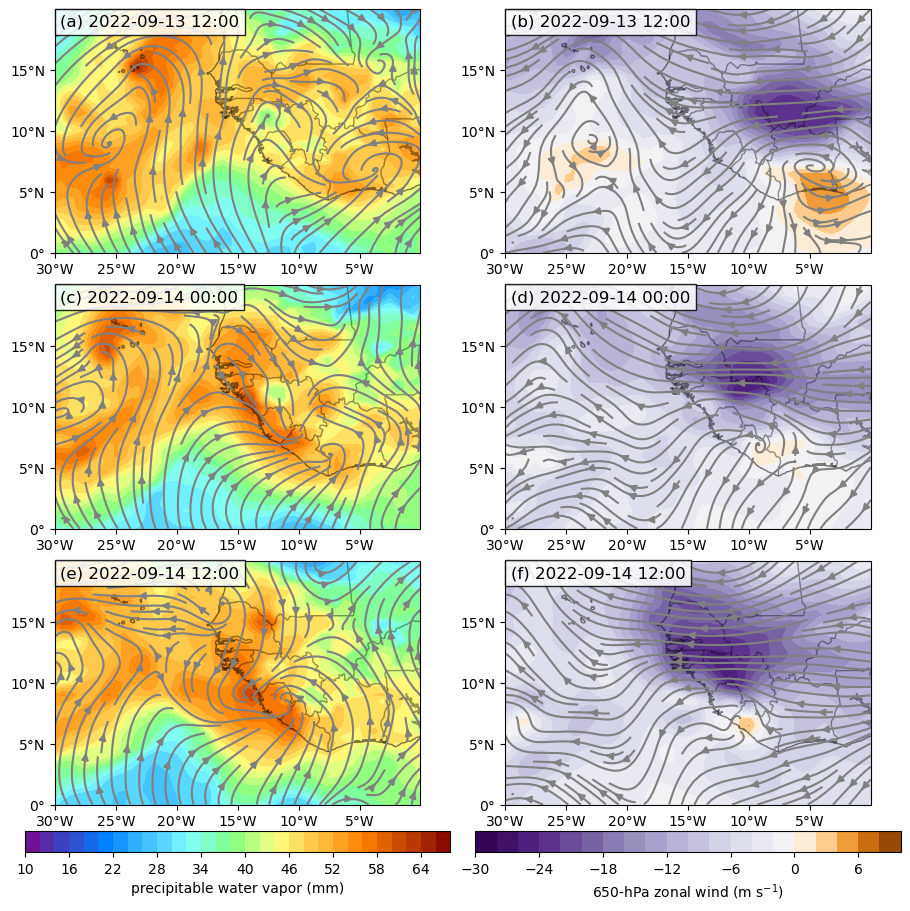

In [8]:
import matplotlib.colors as colors

# Create a TwoSlopeNorm instance
norm = colors.TwoSlopeNorm(vmin=-30, vcenter=0.0, vmax=10.0)

# open figure and maps
projection = ccrs.PlateCarree(central_longitude=centerLon)
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(9,9),constrained_layout=True,
                   subplot_kw={'projection': projection})

j = 0
for i in [0,2,4]:
    
    for axis in ax[int(i/2),:]:
        # ---- first map
        axis.set_extent([minLon, maxLon, minLat, maxLat], crs=projection)
        # Add Latitudes
        axis.set_yticks(np.arange(minLat, maxLat, lat_interval), crs=projection)
        lat_formatter = LatitudeFormatter()
        axis.yaxis.set_major_formatter(lat_formatter) 
        
        # Add Longitudes
        axis.set_xticks(np.arange(minLon, maxLon, lon_interval), crs=projection)
        lon_formatter = LongitudeFormatter(zero_direction_label=True)
        axis.xaxis.set_major_formatter(lon_formatter)
        
        
        #add land boundaries
        landColor='k'
        axis.add_feature(cfeature.COASTLINE.with_scale('10m'),alpha=0.5,edgecolor=landColor)
        axis.add_feature(cfeature.BORDERS, alpha=0.4,edgecolor=landColor)
        axis.add_feature(cfeature.LAKES, alpha=0.4,edgecolor=landColor,facecolor='none')
    
        # add panel labels
        # label = f"({chr(j+97)})"
        label = f"({chr(j+97)}) {formatted_time_strings.isel(time=i).item()}"
        axis.text(0.015, 0.98, label,
            horizontalalignment='left',
            verticalalignment='top',
            transform=axis.transAxes,
            fontsize='12', bbox=dict(facecolor='white', alpha=0.85))
        j += 1
            
            
    # Plot Data
    [X, Y] = np.meshgrid(ds.lon, ds.lat)
    im0 = ax[int(i/2),0].contourf(X, Y, PW.isel(time=i), cmap=defineColormap('precipw'), levels=np.arange(10,70,2))
    # add wind streamlines
    ax[int(i/2),0].streamplot(X,Y,ds.U.isel(time=i).sel(lev=925.0),ds.V.isel(time=i).sel(lev=925.0),color='gray')
    im1 = ax[int(i/2),1].contourf(X, Y, ds.U.isel(time=i).sel(lev=650.0),cmap='PuOr_r',levels=np.arange(-30,12,2), norm=norm)
    # add wind streamlines
    ax[int(i/2),1].streamplot(X,Y,ds.U.isel(time=i).sel(lev=650.0),ds.V.isel(time=i).sel(lev=650.0),color='gray')
    # plt.show()

    # calculate vertical wind shear
    ushear = ds.U.isel(time=i).sel(lev=650.0,lat=12,lon=-10.0,method='nearest')-ds.U.isel(time=i).sel(lev=950.0,lat=12,lon=-10.0,method='nearest')
    vshear = ds.V.isel(time=i).sel(lev=650.0,lat=12,lon=-10.0,method='nearest')-ds.V.isel(time=i).sel(lev=950.0,lat=12,lon=-10.0,method='nearest')
    print((ushear**2.0+vshear**2.0)**0.5)


# add colorbars
cb0 = plt.colorbar(im0, ax=ax[-1,0], orientation='horizontal', pad=0.01)
cb0.set_label('precipitable water vapor (mm)')
cb1 = plt.colorbar(im1, ax=ax[-1,1], orientation='horizontal', pad=0.01)
cb1.set_label('650-hPa zonal wind (m s$^{-1}$)')
plt.savefig('./Figures/synoptic_maps_merra-2_pw+wam+aej_13-14Sept22.jpeg', bbox_inches='tight', dpi=300)

### Let's also check MPAS-A

In [33]:
def read_mpas_latlon_archive(TODAY,fhr,minLat,maxLat,minLon,maxLon,mainVar,**kwargs):
    variablesInfo = {
        'level': 0.0,
        'winds': False,
        'secondVar' : False,
        'accumPeriod': 1,
        'mpasStr':'westAfrica',
    }
    
    for keys in kwargs:
        variablesInfo[keys] = kwargs[keys]
        
    mpasStr = variablesInfo['mpasStr']
    
    out = {}
    
    # define constants
    REarth = 6378.1e3
        
    #read file name as a dataset
    validTimeFormatted=datetime.strftime(datetime.strptime(TODAY+HH, '%Y%m%d%H')+timedelta(hours=(fhr)), '%Y-%m-%d_%H:%M')
    fname='%smpas_init_%s%s_valid_%s_latlon_%s.nc'%(outputDir,TODAY,HH,validTimeFormatted,mpasStr)
    print(fname)
    ds = xr.open_dataset(fname).sel(latitude=slice(minLat,maxLat),longitude=slice(minLon,maxLon)).squeeze()
    if (mainVar == 'rainr'):
        totalRain = ds.rainnc+ds.rainc
        # assumed to be hourly rain rate
        h2 = np.max([fhr-1,0])
        h1 = fhr
        if (h1 != h2):
            # validTimeMinusT = datetime.strftime(datetime.strptime(TODAY+HH, '%Y%m%d%H')+timedelta(hours=int(h2)), '%Y-%m-%d_%H')
            # fname2 = '%smpas_init_%s_valid_%s_latlon_%s.nc'%(outputDir,TODAY+HH,validTimeMinusT,mpasStr)
            validTimeMinusT=datetime.strftime(datetime.strptime(TODAY+HH, '%Y%m%d%H')+timedelta(hours=int(h2)), '%Y-%m-%d_%H:%M')
            fname2='%smpas_init_%s%s_valid_%s_latlon_%s.nc'%(outputDir,TODAY,HH,validTimeMinusT,mpasStr)
            print(fname2)
            ds2 = xr.open_dataset(fname2).sel(latitude=slice(minLat,maxLat),longitude=slice(minLon,maxLon)).squeeze()
            totalRainMinusT = ds2.rainnc+ds2.rainc
            field1 = (totalRain-totalRainMinusT)/(h1-h2)
        else:
            field1 = totalRain*0.0   
    elif (mainVar == '650mb_zonal_wind'):
        field1 = ds['uzonal_isobaric'].sel(u_iso_levels=65000.0)
    else:
        field1 = ds[mainVar]

    out[mainVar] = field1

    #read winds if requested
    if variablesInfo['winds']:
        if (variablesInfo['level'] == 0.0):
            uwind = ds.u10
            vwind = ds.v10
        else:
            uwind = ds.uzonal_isobaric.sel(u_iso_levels=variablesInfo['level'])
            vwind = ds.umeridional_isobaric.sel(u_iso_levels=variablesInfo['level'])
        
        out['uwind']=uwind
        out['vwind']=vwind
    
    return out    

/glade/derecho/scratch/rberrios/projects/ongoing/cpex-cv/2022091212_noomld/intrp_output/mpas_init_2022091212_valid_2022-09-13_12:00_latlon_westAfrica.nc
/glade/derecho/scratch/rberrios/projects/ongoing/cpex-cv/2022091212_noomld/intrp_output/mpas_init_2022091212_valid_2022-09-13_12:00_latlon_westAfrica.nc
/glade/derecho/scratch/rberrios/projects/ongoing/cpex-cv/2022091212_noomld/intrp_output/mpas_init_2022091212_valid_2022-09-14_00:00_latlon_westAfrica.nc
/glade/derecho/scratch/rberrios/projects/ongoing/cpex-cv/2022091212_noomld/intrp_output/mpas_init_2022091212_valid_2022-09-14_00:00_latlon_westAfrica.nc
/glade/derecho/scratch/rberrios/projects/ongoing/cpex-cv/2022091212_noomld/intrp_output/mpas_init_2022091212_valid_2022-09-14_12:00_latlon_westAfrica.nc
/glade/derecho/scratch/rberrios/projects/ongoing/cpex-cv/2022091212_noomld/intrp_output/mpas_init_2022091212_valid_2022-09-14_12:00_latlon_westAfrica.nc


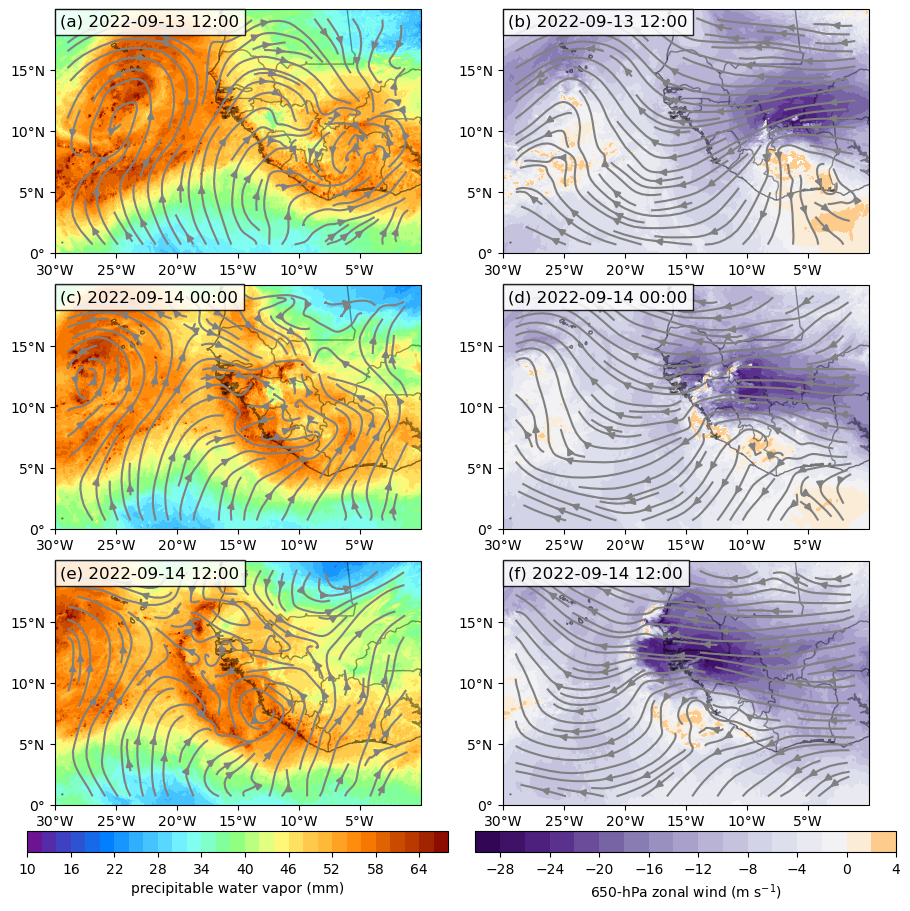

In [36]:
#define basic parameters -- placeholder; some these will come from the command line
mainDir= '/glade/scratch/rberrios/2022-real-time-forecasts/'
mpasDir= '/glade/derecho/scratch/rberrios/projects/ongoing/cpex-cv/'
# mpasDir='/glade/derecho/scratch/rberrios/projects/ongoing/INFORM/IOP9/'
TODAY='20220912'
HH='12'
expName='%s%s_noomld'%(TODAY,HH)

outputDir = f'{mpasDir}{expName}/intrp_output/'
gfsDir='/glade/scratch/rberrios/2022-real-time-forecasts/gfs/%s%s/'%(TODAY,HH)
ifsDir='/glade/scratch/rberrios/2022-real-time-forecasts/ifs/%s%s/'%(TODAY,HH)

#define model and related info
model='mpas'
modelInfo = 'NCAR MPAS-A'

initTime = datetime.strptime(TODAY+HH, '%Y%m%d%H')

#define image directory
# imgDir = '%s%s/%s%s/img/'%(mainDir,model,TODAY,HH)
imgDir = f'{mpasDir}{expName}/img/'
# imgDir='/glade/derecho/scratch/rberrios/projects/ongoing/INFORM/IOP9/%s%s/img/'%(TODAY,HH)

domain='westAfrica'

import matplotlib.colors as colors

# Create a TwoSlopeNorm instance
norm = colors.TwoSlopeNorm(vmin=-30, vcenter=0.0, vmax=10.0)

# open figure and maps
projection = ccrs.PlateCarree(central_longitude=centerLon)
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(9,9),constrained_layout=True,
                   subplot_kw={'projection': projection})

j = 0

for fhr in np.arange(24, 60, 12.0):
    validTime = initTime+timedelta(hours=(fhr)) 
    validTimeFormatted = datetime.strftime(initTime+timedelta(hours=(fhr)), '%Y-%m-%d %H:%M')
    fields1 = read_mpas_latlon_archive(TODAY,fhr,minLat,maxLat,minLon,maxLon,'precipw',winds=True,level=92500.0)
    precipw = fields1['precipw']
    uwind925 = fields1['uwind']
    vwind925 = fields1['vwind']
    del(fields1)
    fields2 = read_mpas_latlon_archive(TODAY,fhr,minLat,maxLat,minLon,maxLon,'650mb_zonal_wind',winds=True,level=65000.0)
    zonalWind = fields2['650mb_zonal_wind']
    uwind650 = fields2['uwind']
    vwind650 = fields2['vwind']
    del(fields2)    
    
    for axis in ax[int(fhr/12)-2,:]:
        # ---- first map
        axis.set_extent([minLon, maxLon, minLat, maxLat], crs=projection)
        # Add Latitudes
        axis.set_yticks(np.arange(minLat, maxLat, lat_interval), crs=projection)
        lat_formatter = LatitudeFormatter()
        axis.yaxis.set_major_formatter(lat_formatter) 
        
        # Add Longitudes
        axis.set_xticks(np.arange(minLon, maxLon, lon_interval), crs=projection)
        lon_formatter = LongitudeFormatter(zero_direction_label=True)
        axis.xaxis.set_major_formatter(lon_formatter)
        
        
        #add land boundaries
        landColor='k'
        axis.add_feature(cfeature.COASTLINE.with_scale('10m'),alpha=0.5,edgecolor=landColor)
        axis.add_feature(cfeature.BORDERS, alpha=0.4,edgecolor=landColor)
        axis.add_feature(cfeature.LAKES, alpha=0.4,edgecolor=landColor,facecolor='none')
    
        # add panel labels
        label = f"({chr(j+97)}) {validTimeFormatted}"
        axis.text(0.015, 0.98, label,
            horizontalalignment='left',
            verticalalignment='top',
            transform=axis.transAxes,
            fontsize='12', bbox=dict(facecolor='white', alpha=0.85))
        j+=1
              
    # Plot Data
    [X, Y] = np.meshgrid(precipw.longitude, precipw.latitude)
    im0 = ax[int(fhr/12)-2,0].contourf(X, Y, precipw, cmap=defineColormap('precipw'), levels=np.arange(10,70,2))
    # add wind streamlines
    ax[int(fhr/12)-2,0].streamplot(X,Y,uwind925,vwind925,color='gray')
    im1 = ax[int(fhr/12)-2,1].contourf(X, Y, zonalWind,cmap='PuOr_r',levels=np.arange(-30,5,2), norm=norm)
    # add wind streamlines
    ax[int(fhr/12)-2,1].streamplot(X,Y,uwind650,vwind650,color='gray')
    # plt.show()

# add colorbars
cb0 = plt.colorbar(im0, ax=ax[-1,0], orientation='horizontal', pad=0.01)
cb0.set_label('precipitable water vapor (mm)')
cb1 = plt.colorbar(im1, ax=ax[-1,1], orientation='horizontal', pad=0.01)
cb1.set_label('650-hPa zonal wind (m s$^{-1}$)')
plt.savefig('./Figures/synoptic_maps_MPAS_pw+wam+aej_13-14Sept22.jpeg',bbox_inches='tight',dpi=300)

In [ ]:
### left remapping the mpas files to get to Greenwhich... undecided if I'll show conditions at 12Z 13 Sept, additional times, or the average conditions...